In [60]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [61]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

## 기본 용어정리

### 표본
- 조사대상이 되는 전체 모집단에 대해 샘플링을 통해 얻어지는 결과 값, 모집단의 부분집합

### 모집단
- 어떤 데이터 집합을 구성하는 전체 대상 혹은 집합을 말한다. 즉, 연구자가 알고 싶어하는 대상 또는 효과에 대한 전체 집단이다.


- 대한민국 남자 고등학생의 평균키를 알고 싶다 -> (모집단) 대한민국 전체 고등학교 남학생의 키

### 모수
- 모집단을 조사하여 얻을 수 있는 통계적인 특성치를 모수(Population Parameter)라고 하며, 모집단 분포의 특성을 규정짓는 척도이다. (모평균, 모분산, 모표준편차 등)


- 일반적으로 모수는 알려져 있지 않은 미지의 상수로 취급되며 통계적 추론을 통해 모수를 추론할 수 있다.

## 부트스트랩(Bootstrap)
- 통계량이나 모수의 표본분포를 쉽고 효과적으로 추정하기 위해서, __현재 있는 표본에서 추가적으로 표본을 복원 추출__하고 __각 표본에 대한 통계량을 다시 계산__하는 것(절차)입니다.


- 데이터나 표본통계량이 정규분포를 따라야 한다는 가정이 꼭 필요하지 않다. 


- 이 방법을 사용하면 예를 들어 표본의 수가 30개 밖에 안될지라도, 부트스트랩을 통해 30개보다 더 많은 통계량을 구할 수 있어 모수를 더 정확히 추정할 수 있습니다.

### 부트스트랩 프로세스

- 핵심 아이디어 : __복원추출__

1. 표본에서 샘플 값을 뽑아서 기록하고 다시 제자리에 놓는다.
2. 이를 n번 반복한다
3. n번 재표본추출한 값의 평균을 구한다.
4. 1-3단계를 R번 반복한다. (R : 부트스트랩 반복 횟수)

위의 과정을 [다음 사이트](https://seeing-theory.brown.edu/frequentist-inference/index.html#section3)에서 시각화해서 확인해 볼 수 있다.

### 실습1. 대출 신청자의 연간 소득 데이터(교재)

In [62]:
data_path = '/content/gdrive/MyDrive/Data Analysis/Aiffel/FLP/Statistics/loans_income.csv'
loans_income = pd.read_csv(data_path, squeeze=True)

In [63]:
loans_income.shape

(50000,)

In [64]:
loans_income.head(10)

0     67000
1     52000
2    100000
3     78762
4     37041
5     33000
6     38500
7     85000
8    120000
9     57000
Name: x, dtype: int64

In [65]:
loans_income.describe()

count     50000.00000
mean      68760.51844
std       32872.03537
min        4000.00000
25%       45000.00000
50%       62000.00000
75%       85000.00000
max      199000.00000
Name: x, dtype: float64

In [66]:
results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 62000.0
bias: -63.955000000001746
std. error: 197.9966480717485


### 실습2. [캐글] Heart Failure Prediction(심부전증 예방)
- 참고 노트북 : [Bootstrap for small sample & Estimation (83.6%)](https://www.kaggle.com/jjmewtw/bootstrap-for-small-sample-estimation-83-6/notebook)

#### Data cleaning

In [67]:
# Basic libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for bootstrap
from sklearn.utils import resample

In [68]:
data_path = '/content/gdrive/MyDrive/Data Analysis/Aiffel/FLP/Statistics/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(data_path)

In [69]:
df.shape

(299, 13)

In [70]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


- 컬럼 정보
  - age: 환자의 나이
  - anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
  - creatinine_phosphokinase: 크레아틴키나제 검사 결과
  - diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
  - ejection_fraction: 박출계수 (%)
  - high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
  - platelets: 혈소판 수 (kiloplatelets/mL)
  - serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
  - serum_sodium: 혈중 나트륨 레벨 (mEq/L)
  - sex: 성별 (0: 여성, 1: 남성)
  - smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
  - time: 관찰 기간 (일)
  - DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [72]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [73]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

print(CategoricalVariables)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

print(NumericVariables)

[]
['anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT', 'age', 'platelets', 'serum_creatinine']


#### Bootstrap

First, we apply scaling to continous features.

In [74]:
AllVars = list(df.columns)  
ContVars = ['age','ejection_fraction','creatinine_phosphokinase','platelets','serum_creatinine','serum_sodium','time']
BinVars = [x for x in AllVars if x not in ContVars]

df.index.name = 'Id'

sc_df = df
sc_df[ContVars] = minmax_scaling(df, columns=ContVars)

Now, we will apply bootstrap to our data. We implement our data set as first argument, we allow for replacement and use pre-defined random state. The argument number of samples is not trivial. How to choose? Similarly to any train/test set in other topics. Hence, as our number of records is 299, we will chose let's say 80% of them. Will it be really 80%? No, because of resampling, in other words some records may appear twice or more and some records will not appear there for sure.

In [75]:
NoRecords = df.shape[0]
RandState = 100

boot = resample(sc_df, replace=True, n_samples=round(NoRecords*0.80), random_state=RandState) # 240 ~= 299 * 80%
boot.shape

(239, 13)

In [76]:
boot_indices_list = list(boot.index)  
boot_indices = pd.DataFrame(boot.index)  

# out of bag observations
oob = sc_df[~sc_df.index.isin(boot_indices_list)]
print('The number of records in bootstrap sample is: ' + format(boot.shape[0]) + '. The number of records in out-of-bag sample is: ' + format(oob.shape[0]))

The number of records in bootstrap sample is: 239. The number of records in out-of-bag sample is: 130


For this random seed, we have even 130 out-of-bag records, what means that in total 130 records did not appear in our bootstrap sample. Let's investigate how many records appear more than once.

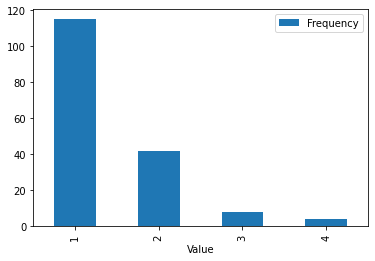

In [77]:
boot_indices_agg = boot_indices.groupby('Id').Id.count()

(unique, counts) = np.unique(boot_indices_agg, return_counts=True)

boot_indices_agg = pd.DataFrame(np.asarray((unique, counts)).T, columns = ['Value','Frequency'])

boot_indices_agg.plot(kind='bar',x='Value',y='Frequency')

### 추가 참고자료
- [DATA - 12. 부트스트랩(Bootstrap)](https://bkshin.tistory.com/entry/DATA-12)